In [29]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

import seaborn as sns
np.set_printoptions(suppress=True)

1) Convert date column to datetime format.

In [41]:
stores = pd.read_csv('stores.csv')
sales = pd.read_csv('sales.csv')
items = pd.read_csv('items.csv')

In [42]:
items_sales = items.merge(sales, left_on='item_id', right_on='item')

In [43]:
merged = items_sales_stores = items_sales.merge(stores, left_on='store', right_on='store_id')

In [44]:
merged.head()

,Unnamed: 0_x,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0_y,item,sale_amount,sale_date,sale_id,store,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [45]:
merged = merged.drop(columns=(['Unnamed: 0', 'Unnamed: 0_y', 'Unnamed: 0_x']))

In [46]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_brand     913000 non-null  object 
 1   item_id        913000 non-null  int64  
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   item_upc12     913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item           913000 non-null  int64  
 7   sale_amount    913000 non-null  float64
 8   sale_date      913000 non-null  object 
 9   sale_id        913000 non-null  int64  
 10  store          913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [47]:
merged.sale_date = pd.to_datetime(merged.sale_date)

In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item_brand     913000 non-null  object             
 1   item_id        913000 non-null  int64              
 2   item_name      913000 non-null  object             
 3   item_price     913000 non-null  float64            
 4   item_upc12     913000 non-null  int64              
 5   item_upc14     913000 non-null  int64              
 6   item           913000 non-null  int64              
 7   sale_amount    913000 non-null  float64            
 8   sale_date      913000 non-null  datetime64[ns, UTC]
 9   sale_id        913000 non-null  int64              
 10  store          913000 non-null  int64              
 11  store_address  913000 non-null  object             
 12  store_city     913000 non-null  object             
 13  store_id       913000 non-nul

In [48]:
merged['sale_date'] = pd.to_datetime(merged['sale_date']).dt.date

In [49]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,2013-01-03,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-04,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,2013-01-05,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


2) Plot the distribution of sale_amount and item_price.

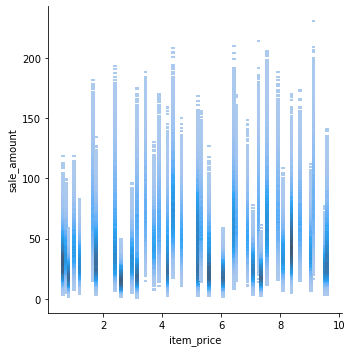

In [31]:
sns.displot(merged, y="sale_amount", x='item_price')

3) Set the index to be the datetime variable.

In [40]:
merged = merged.set_index('sale_date').sort_index()
merged.head()

KeyError: "None of ['sale_date'] are in the columns"

In [35]:
merged.index.value_counts()

2015-01-30 00:00:00+00:00    500
2017-02-09 00:00:00+00:00    500
2016-08-30 00:00:00+00:00    500
2013-04-10 00:00:00+00:00    500
2015-08-18 00:00:00+00:00    500
                            ... 
2017-12-29 00:00:00+00:00    500
2015-04-07 00:00:00+00:00    500
2016-06-10 00:00:00+00:00    500
2014-09-30 00:00:00+00:00    500
2017-07-04 00:00:00+00:00    500
Name: sale_date, Length: 1826, dtype: int64

In [39]:
merged['index'] = pd.to_datetime(merged['index']).dt.date


AttributeError: 'DatetimeIndex' object has no attribute 'dt'